# Direction-selective Cells Data Exploration

The data are from Franke et al. 2016 article  : "Structures of Neural Correlation and How They Favor Coding"
https://www.sciencedirect.com/science/article/pii/S0896627315011393

In [6]:
# here we import the mat file and extract its data in python structure
from scipy.io import loadmat
data = loadmat('export.mat')
dir_assigned_manually = data['exportForUlisse']['dir_assigned_manually'][0,:][0]
spikeCounts = data['exportForUlisse']['spikeCounts'][0,:][0] #size of 100 trials x 36 directions x 90 cells
expIdx = data['exportForUlisse']['expIdx'][0,0][0]


expIndexs = []
for i in range(1,8):
    expIndexs.append([index for index, value in enumerate(expIdx) if value == i])
    print("Cells of experiment "+str(i)+" : ")
    print(expIndexs[-1])


Cells of experiment 1 : 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Cells of experiment 2 : 
[17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
Cells of experiment 3 : 
[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
Cells of experiment 4 : 
[42, 43, 44, 45, 46, 47, 48, 49, 50]
Cells of experiment 5 : 
[51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]
Cells of experiment 6 : 
[66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]
Cells of experiment 7 : 
[84, 85, 86, 87, 88, 89]


<IPython.core.display.Javascript object>


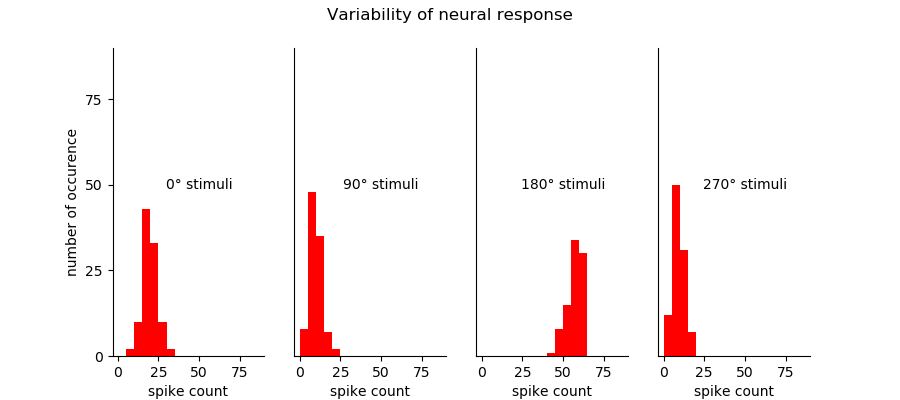

interactive(children=(IntSlider(value=15, description='c', max=89), Output()), _dom_classes=('widget-interact'…

In [23]:
%matplotlib notebook

from ipywidgets import *

import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,4,figsize=(9,4))
fig.suptitle("Variability of neural response")
theta_range = range(0,360,10)

col='red'
bining = range(0,70,5)

def update(c):
    
    axs[0].clear()
    axs[1].clear()
    axs[2].clear()
    axs[3].clear()
    
    axs[0].hist(spikeCounts[:,0,c],bins=bining,color=col)
    axs[1].hist(spikeCounts[:,9,c],bins=bining,color=col)
    axs[2].hist(spikeCounts[:,18,c],bins=bining,color=col)
    axs[3].hist(spikeCounts[:,27,c],bins=bining,color=col)
    
    axs[0].spines['right'].set_visible(False)
    axs[0].spines['top'].set_visible(False)
    axs[1].spines['right'].set_visible(False)
    axs[1].spines['top'].set_visible(False)
    axs[2].spines['right'].set_visible(False)
    axs[2].spines['top'].set_visible(False)
    axs[3].spines['right'].set_visible(False)
    axs[3].spines['top'].set_visible(False)
    
    axs[0].set_ylim(top=90)
    axs[1].set_ylim(top=90)
    axs[2].set_ylim(top=90)
    axs[3].set_ylim(top=90)
    
    axs[0].set_xlim(right=90)
    axs[1].set_xlim(right=90)
    axs[2].set_xlim(right=90)
    axs[3].set_xlim(right=90)
    
    axs[0].set_xticks([0,25,50,75])
    axs[1].set_xticks([0,25,50,75])
    axs[2].set_xticks([0,25,50,75])
    axs[3].set_xticks([0,25,50,75])
    
    axs[0].set_yticks([0,25,50,75])
    axs[1].axes.get_yaxis().set_visible(False)
    axs[2].axes.get_yaxis().set_visible(False)
    axs[3].axes.get_yaxis().set_visible(False)
    
    axs[0].set_xlabel("spike count")
    axs[1].set_xlabel("spike count")
    axs[2].set_xlabel("spike count")
    axs[3].set_xlabel("spike count")
    axs[0].set_ylabel("number of occurence")
    
    axs[0].text(50, 50, '0° stimuli', horizontalalignment='center', verticalalignment='center')
    axs[1].text(50, 50, '90° stimuli', horizontalalignment='center', verticalalignment='center')
    axs[2].text(50, 50, '180° stimuli', horizontalalignment='center', verticalalignment='center')
    axs[3].text(50, 50, '270° stimuli', horizontalalignment='center', verticalalignment='center')

    
    
interact(update,c=widgets.IntSlider(min=0,max=89,step=1,value=15));


<IPython.core.display.Javascript object>


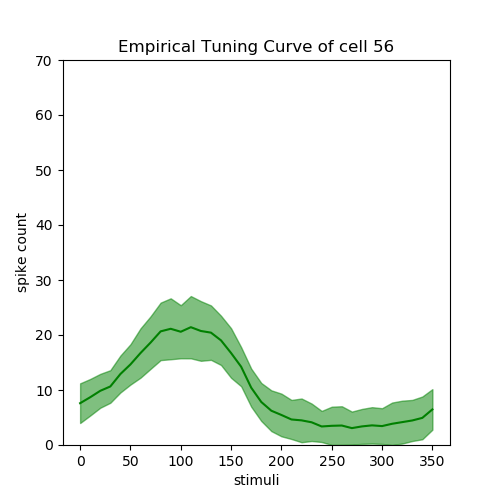

interactive(children=(IntSlider(value=0, description='c', max=89), Output()), _dom_classes=('widget-interact',…

In [12]:
%matplotlib notebook

from ipywidgets import *

import numpy as np
import matplotlib.pyplot as plt

theta_range = range(0,360,10)

mu = np.mean(spikeCounts[:,:,0],axis=0)
std = np.std(spikeCounts[:,:,0],axis=0)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)


def TC(theta,theta_0,bl,s,n0):
    if theta_0 > 180 :
        if theta >= theta_0-180:
            return n0*((1-bl)*np.exp(-(theta-theta_0)**2 / (2 * s**2)) +bl)
        else :
            return n0*((1-bl)*np.exp(-(theta-theta_0+360)**2 / (2 * s**2)) +bl)
    else :
        if theta <= theta_0+180:
            return n0*((1-bl)*np.exp(-(theta-theta_0)**2 / (2 * s**2)) +bl)
        else :
            return n0*((1-bl)*np.exp(-(theta-theta_0-360)**2 / (2 * s**2)) +bl)
        


def update(c):
    mu = np.mean(spikeCounts[:,:,c],axis=0)
    std = np.std(spikeCounts[:,:,c],axis=0)
    ax.clear()
    ax.set_ylim(top=70)
    ax.plot(theta_range,mu,color='g')
    ax.fill_between(theta_range,mu+std,mu-std, alpha=0.5,color='g')
    ax.set_xlabel("stimuli")
    ax.set_ylabel("spike count")
    ax.set_title("Empirical Tuning Curve of cell "+str(c))
    
interact(update,c=widgets.IntSlider(min=0,max=89,step=1,value=0));

plt.show()

by looking through the cell curves, we find that :

- c=1 correspond to the red cell tuned at 180°
- c=5 correspond to the green cell tuned at 90°
- c=8 correspond to the blue cell tuned at 0°
- c=15 correspond to the yellow cell tuned at 270°


We carry on with this example quadruplet tuned to each of the four cardinal directions

<IPython.core.display.Javascript object>


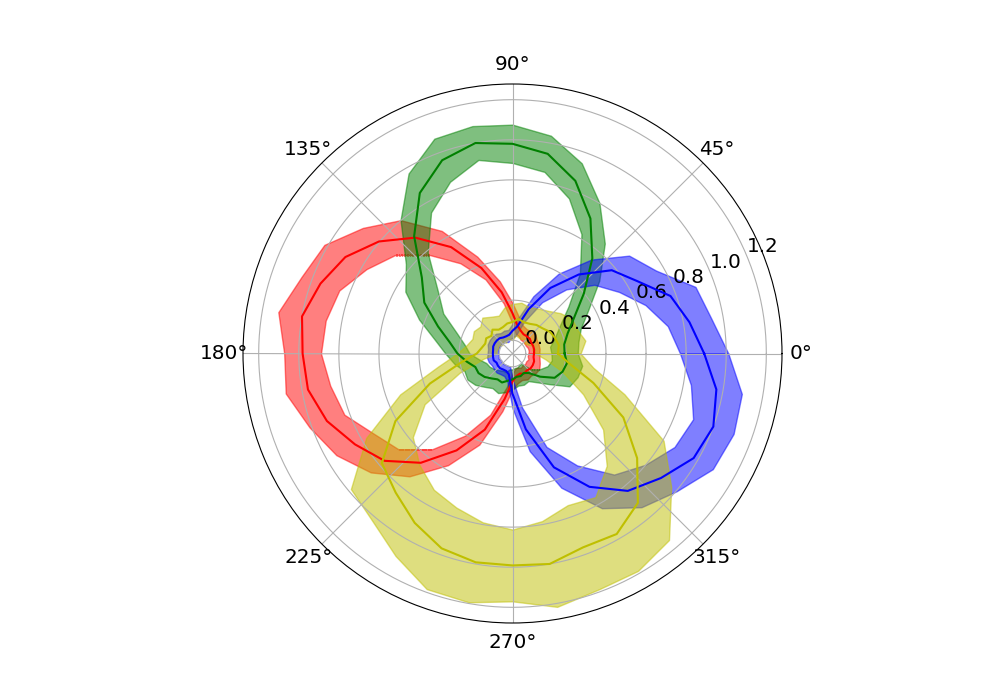

In [25]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

colors = ['r','g','b','y']
i = 0
for c in [1,5,8,15]:
    
    mu = np.mean(spikeCounts[:,:,c],axis=0)
    mu = np.append(mu,mu[0])
    mu_max = np.max(mu)
    mu = np.divide(mu, mu_max)
    std = np.std(spikeCounts[:,:,c],axis=0)
    std = np.append(std,std[0])
    std= np.divide(std,mu_max)

    ax.plot(np.radians(list(theta_range)+[0]),mu,color=colors[i])
    ax.fill_between(np.radians(list(theta_range)+[0]),mu+std,mu-std, alpha=0.5,color=colors[i])
    i+=1

18


<IPython.core.display.Javascript object>


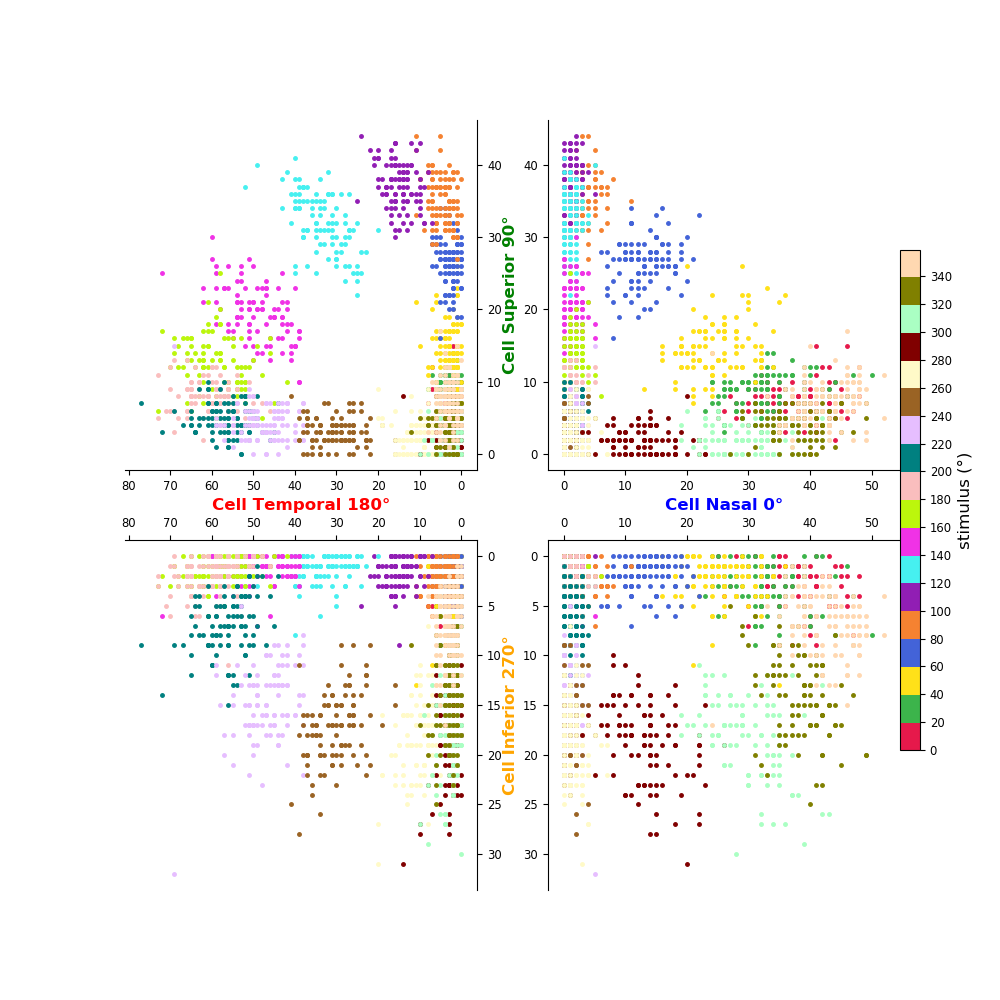

In [27]:
%matplotlib notebook

'''
by lookingthrough the curves, we find that :

- c=8 correspond to the blue cell 0°
- c=5 correspond to the green cell 90°
- c=1 correspond to the red cell 180°
- c=15 correspond to the yellow cell 270°

'''

params = {'legend.fontsize': 'x-small',
          'figure.figsize': (7, 7),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}


pylab.rcParams.update(params)

colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', 
          '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1']
print(len(colors))
cell_couples = [[8,5],[1,5],[1,15],[8,15]]
couples = [["0°","90°"],["180°","90°"],["180°","270°"],["0°","270°"]]

fig, axs = plt.subplots(2,2,figsize=(10,10))
(ax1, ax2), (ax3, ax4) = axs
axs = [ax2,ax1,ax3,ax4]

for i in range(4):
    for dir in range(0,36,2):
        axs[i].plot(spikeCounts[:,dir,cell_couples[i][0]],
                    spikeCounts[:,dir,cell_couples[i][1]],'.',color=colors[dir//2],
                   markersize=5)
        #axs[i].set_xlabel(couples[i][0])
        #axs[i].set_ylabel(couples[i][1])
        
        
ax1.set_xlim(ax1.get_xlim()[::-1])
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_label_position("right")
ax1.yaxis.tick_right()

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax3.set_xlim(ax3.get_xlim()[::-1])
ax3.set_ylim(ax3.get_ylim()[::-1])
ax3.spines['left'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.xaxis.set_label_position("top")
ax3.xaxis.tick_top()
ax3.yaxis.set_label_position("right")
ax3.yaxis.tick_right()

ax4.set_ylim(ax4.get_ylim()[::-1])
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_visible(False)

ax4.xaxis.set_label_position("top")
ax4.xaxis.tick_top()


ax2.set_xlabel("Cell Nasal 0°", fontweight='bold',color='b')
ax2.set_ylabel("Cell Superior 90°", fontweight='bold',color='g')
ax1.set_xlabel("Cell Temporal 180°", fontweight='bold',color='r')
ax4.set_ylabel("Cell Inferior 270°", fontweight='bold',color='orange')

from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
cmap =  LinearSegmentedColormap.from_list("yolo",colors=colors, N=18) #plt.get_cmap('tab20',18) #
norm = mpl.colors.Normalize(vmin=0,vmax=360)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar_ax = fig.add_axes([0.9, 0.25, 0.02, 0.5])
fig.colorbar(sm, ticks= range(0,360,20), 
             boundaries=np.arange(0,360,1),label="stimulus (°)", cax=cbar_ax)

plt.show()

we plot the spike count variance against its mean to see if it can be approximated by a poisson distribution, for each cell and each trial.

<IPython.core.display.Javascript object>


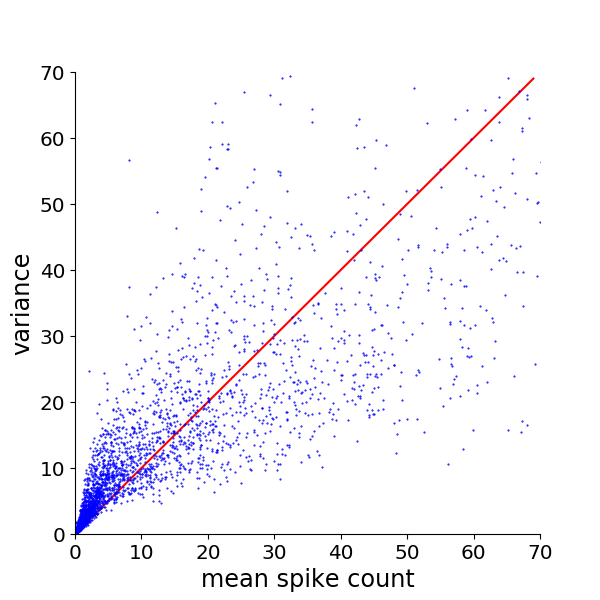

In [28]:


%matplotlib notebook
import brewer2mpl

colors_exp = plt.cm.Set2(np.linspace(0,1,9))

params = {'legend.fontsize': 'medium',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

fig = plt.figure(figsize=(6,6))
ax2 = fig.add_subplot(1, 1, 1)


ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.plot(range(0,70),range(0,70),color='r')

j = 0
for exp in expIndexs :
    for c in exp:
         ax2.plot(np.mean(spikeCounts[:,:,c],axis=0),np.var(spikeCounts[:,:,c],axis=0),'.',
                  color='b', markersize=1)
    j+=1
            
ax2.set_ylim(0,70)
ax2.set_xlim(0,70)
ax2.set_xlabel("mean spike count")
ax2.set_ylabel("variance")

plt.show()

Now, we can compute the joint probability distribution and the SSI for poisson model of single cells fitted on the data

In [29]:
import scipy.ndimage as ndimage
from scipy.stats import poisson

# cell index
c = 1

# maximal spike count 
Max_sc = 150
# number of direction
NB_dir = 36
#number of trial per direction
NB_trial=100

p_theta= 1/NB_dir
theta_step=10
theta_range= np.arange(0,360,theta_step)
n_step = 1
n_range = np.arange(0,Max_sc,n_step)

# baseline value of the tuning curve, which was 0.16 usually, but it seems 
# to be way lower in this paper
b = 0.2
time_bin = 0.3
# amplitude of the tuning curve in Hz
f0 = 60/time_bin
sigma_f=50
#tuning curve, bell-shaped with a baseline
def f(theta,theta_0=1000):
    if theta_0==1000:
        theta_0 = d
    if theta_0 > 180 :
        if theta >= theta_0-180:
            return f0*((1-b)*np.exp(-(theta-theta_0)**2 / (2 * sigma_f**2)) +b)
        else :
            return f0*((1-b)*np.exp(-(theta-theta_0+360)**2 / (2 * sigma_f**2)) +b)
    else :
        if theta <= theta_0+180:
            return f0*((1-b)*np.exp(-(theta-theta_0)**2 / (2 * sigma_f**2)) +b)
        else :
            return f0*((1-b)*np.exp(-(theta-theta_0-360)**2 / (2 * sigma_f**2)) +b)
        
def p_n_theta_1n(n_list,theta):
    return(poisson(f(theta)*time_bin).pmf(n_list))

# create a look-up table containing all P(r|theta) = p(r|theta)/Z avec Z = sum_{r}p(r|theta)
def compute_lookup_table_1n():
    P_mat = np.zeros((len(n_range),len(theta_range)))
    for j in range(len(theta_range)):
        P_mat[:,j] = p_n_theta_1n(n_range,theta_range[j])
        P_mat[:,j] *= p_theta/np.sum(P_mat[:,j])
    return(P_mat)

def compute__empirical_proba_matrix(c,sigma=5):
    freq_matrix = np.zeros((Max_sc,NB_dir))
    for d in range(36):
        for t in range(NB_trial):
            freq_matrix [ spikeCounts[t,d,c] , d] = freq_matrix [ spikeCounts[t,d,c] , d] + 1
    
    freq_matrix = ndimage.gaussian_filter1d(freq_matrix, sigma=sigma+10**-10, axis=0)
    proba_matrix = freq_matrix / np.sum(freq_matrix)
    
    return(proba_matrix)

def compute_freq_matrix(c,sigma=5):
    freq_matrix = np.zeros((Max_sc,NB_dir))
    for d in range(36):
        for t in range(NB_trial):
            freq_matrix [ spikeCounts[t,d,c] , d] = freq_matrix [ spikeCounts[t,d,c] , d] + 1
    
    freq_matrix = ndimage.gaussian_filter1d(freq_matrix, sigma=sigma+10**-10, axis=0)
    proba_matrix = freq_matrix
    
    return(proba_matrix)

def spec_inf(lookup_table,i_n):
    entropy = -p_theta*np.log2(p_theta)*len(theta_range)
    cond_entropy = 0
    Z = [ lookup_table[i_n,i_theta] for i_theta in range(len(theta_range))] 
    p_n = sum(Z)/len(theta_range) +10**(-100)
    for i_theta in range(len(theta_range)):
        p_t_n = lookup_table[i_n,i_theta]*p_theta/p_n
        cond_entropy += -p_t_n*np.log2(p_t_n +10**(-100))  
    return(entropy-cond_entropy)

def SSI(P_mat,spec_infs,i_theta):
    SSI = 0
    for i_n in range(0,len(n_range)):
        SSI += spec_infs[i_n]*P_mat[i_n,i_theta]/p_theta
    return(SSI)


def cell_calc(c,sigma=5):
    proba_matrix = compute__empirical_proba_matrix(c,sigma)
    spec_infs = []
    for i_n in  range(len(n_range)) :
        spec_infs.append(spec_inf(proba_matrix,i_n))
    ssi = []
    for theta in range(len(theta_range)):
        ssi.append(SSI(proba_matrix,spec_infs,theta))
    return(proba_matrix,spec_infs,ssi)

def model_calc():
    proba_matrix = compute_lookup_table_1n()
    spec_infs = []
    for i_n in  range(len(n_range)) :
        spec_infs.append(spec_inf(proba_matrix,i_n))
    ssi = []
    for theta in range(len(theta_range)):
        ssi.append(SSI(proba_matrix,spec_infs,theta))
    return(proba_matrix,spec_infs,ssi)


## Empirical SSI computation

<IPython.core.display.Javascript object>


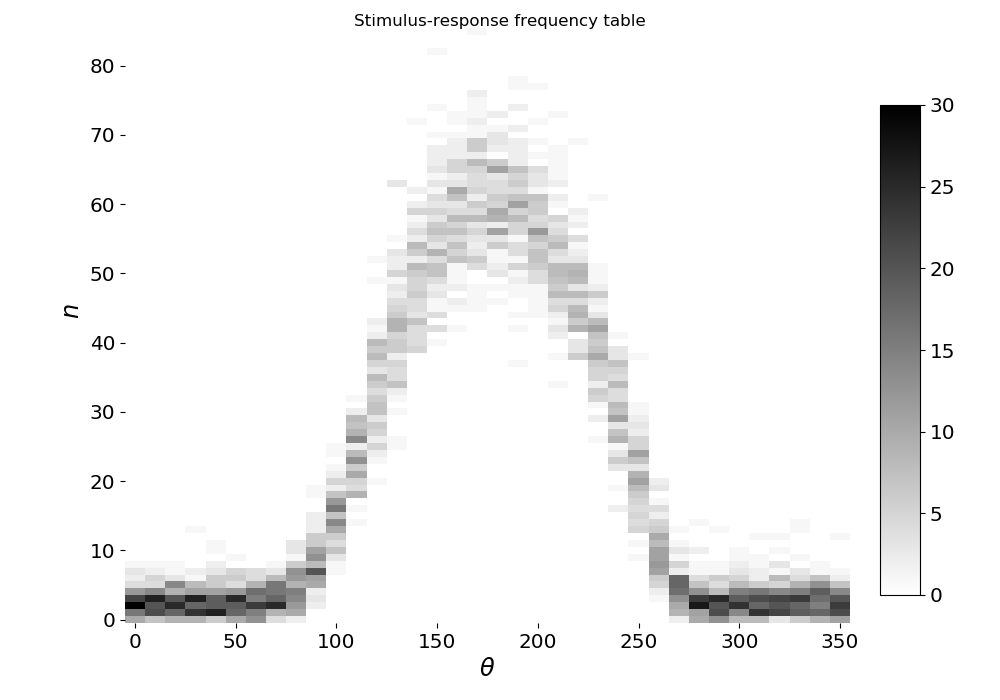

In [31]:
### We plot the frequency table of stimulus-response pairs for cell 1 ###

%matplotlib notebook
params = {'legend.fontsize': 'medium',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

M = compute_freq_matrix(1,0)

fig, ax = plt.subplots(nrows=1, ncols=1)

# find minimum of minima & maximum of maxima
minmin = np.min([np.min(M), np.min(M)])
maxmax = np.max([np.max(M), np.max(M)])

im1 = ax.matshow(M[0:90], vmin=minmin, vmax=maxmax,aspect='auto',origin="lower",cmap='binary')

ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$n$')

ax.set_xticks([t for t in range(0,36,5)])
ax.set_xticklabels([t for t in range(0,360,50)])
plt.gca().xaxis.tick_bottom()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# add space for colour bar
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.15, 0.04, 0.7])
fig.colorbar(im1, cax=cbar_ax)
fig.suptitle("Stimulus-response frequency table")


plt.subplots_adjust(top=1)

<IPython.core.display.Javascript object>


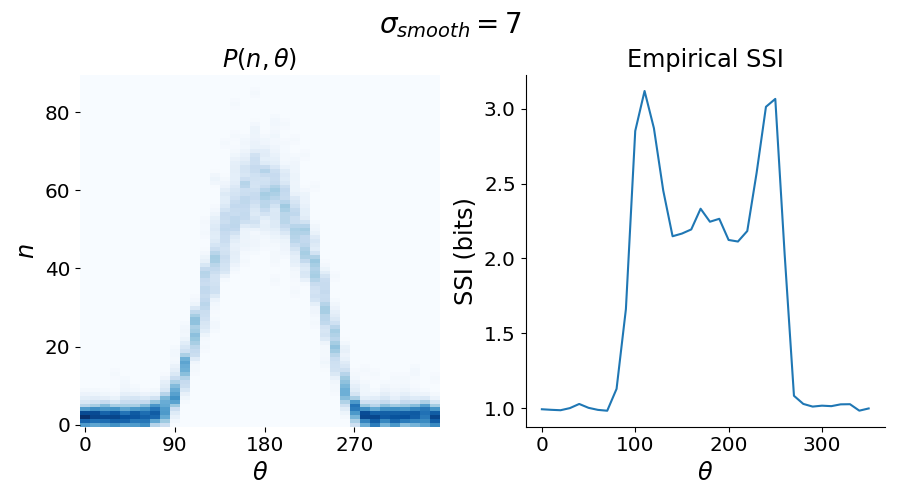

interactive(children=(IntSlider(value=1, description='c', max=89), Output()), _dom_classes=('widget-interact',…

In [34]:
%matplotlib notebook
params = {'legend.fontsize': 'medium',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

fig, axs = plt.subplots(1,2,figsize=(9,5))
     

def update(c):
    P_mat,SIs,SSIs = cell_calc(c,sigma=1)
    mu = np.mean(spikeCounts[:,:,c],axis=0)
    std = np.std(spikeCounts[:,:,c],axis=0)

    
    axs[0].clear()
    axs[0].imshow(P_mat[0:90],aspect='auto',origin="lower",cmap='Blues')
    axs[0].set_xlabel(r'$\theta$')
    axs[0].set_ylabel(r'$n$')
    axs[0].set_xticks([t for t in range(0,36,9)])
    axs[0].set_xticklabels([t for t in range(0,360,90)])
    axs[0].set_title(r'$P(n,\theta)$')
    
    axs[1].clear()
    axs[1].plot(theta_range, SSIs)
    axs[1].set_xlabel(r'$\theta$')
    axs[1].set_ylabel(r'SSI (bits)')
    axs[1].set_title('Empirical SSI')
    axs[1].spines['right'].set_visible(False)
    axs[1].spines['top'].set_visible(False)
    axs[0].spines['right'].set_visible(False)
    axs[0].spines['top'].set_visible(False)
    axs[0].spines['left'].set_visible(False)
    axs[0].spines['bottom'].set_visible(False)
    
    fig.suptitle(r"$\sigma_{smooth}=7$",fontsize=20)
    
    fig.tight_layout()
    
    
interact(update,c=widgets.IntSlider(min=0,max=89,step=1,value=1));

plt.subplots_adjust(top=0.85)
    

plt.show()

## Fitting gaussian tuning curve with poisson noise on the cells data

In [40]:
# OPTIMIZE THE MODEL TO FIT THE DATA WITH MAXIMUM LIKELIHOOD ESTIMATION

%matplotlib notebook
from scipy.optimize import minimize
from tqdm import tqdm_notebook as tqdm
from scipy.optimize import basinhopping


c = 1

def TC(theta,theta_0,bl,s,n0):
    if theta_0 > 180 :
        if theta >= theta_0-180:
            return n0*((1-bl)*np.exp(-(theta-theta_0)**2 / (2 * s**2)) +bl)
        else :
            return n0*((1-bl)*np.exp(-(theta-theta_0+360)**2 / (2 * s**2)) +bl)
    else :
        if theta <= theta_0+180:
            return n0*((1-bl)*np.exp(-(theta-theta_0)**2 / (2 * s**2)) +bl)
        else :
            return n0*((1-bl)*np.exp(-(theta-theta_0-360)**2 / (2 * s**2)) +bl)
        
def loglik(params):
    
    theta_0 = params[0]
    bl = params[1]
    s = params[2]
    n0 = params[3]
    
    x1 = 0
    x2 = 0
    tc_val = 0
    for i_theta in range(36) :
        tc_val = TC(theta_range[i_theta],theta_0,bl,s,n0)
        x2 += tc_val
        x1+= np.sum(spikeCounts[:,i_theta,c])*np.log(tc_val)
    x2 =  NB_trial*x2
    l = x2 - x1
    
    return l

models_params = []

Cs = range(90)
np.set_printoptions(formatter={"float_kind": lambda x: "%g" % x})
print("parameters : [ theta_0 baseline  sigma n_0 ]")
for c in tqdm(Cs): 
    lik_model = minimize(loglik, np.array([dir_assigned_manually[c][0]+180,0.05,40,30]),
                         bounds=[(None,None),(0,0.2),(10,200),(0,200)],
                         method='l-bfgs-b')
    params = lik_model['x']
    print("Cells "+str(c)+" :",np.array(params))
    models_params.append(params)


parameters : [ theta_0 baseline  sigma n_0 ]


Cells 0 : [170.554 0.2 36.3996 69.1383]
Cells 1 : [177.534 0.0325833 42.5696 67.5599]
Cells 2 : [176.696 0.153054 35.0607 47.4615]
Cells 3 : [175.35 0 84.3374 47.2591]
Cells 4 : [447.336 0.125486 39.1535 43.4612]
Cells 5 : [454.815 0.0939476 41.951 35.9524]
Cells 6 : [355.475 0.0315021 61.9679 39.5515]
Cells 7 : [357.587 0 67.5666 44.7482]
Cells 8 : [347.945 0.0224208 40.4585 46.3702]
Cells 9 : [356.176 0.0374496 36.1588 47.5655]
Cells 10 : [376.021 0.0752142 40.9566 22.3165]
Cells 11 : [264.026 0.0932387 32.1481 28.8083]
Cells 12 : [273.944 0.0655695 34.2939 41.1476]
Cells 13 : [268.777 0.2 104.398 20.462]
Cells 14 : [266.659 0.12871 37.403 26.7318]
Cells 15 : [271.706 0.074343 43.4985 21.3817]
Cells 16 : [258.883 0.0615535 37.2372 53.3129]
Cells 17 : [193.083 0.00311887 44.7114 92.7511]
Cells 18 : [179.826 0.00275517 30.7642 94.5736]
Cells 19 : [460.852 0.00070163 35.9903 102.849]
Cells 20 : [456.051 0 69.6126 33.5796]
Cells 21 : [393.075 0.0115324 30.0671 85.1252]
Cells 22 : [383.49

C:\Users\fphub\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log


Cells 35 : [342.468 0.00230784 35.5311 76.4359]
Cells 36 : [344.695 0 45.9742 75.8941]
Cells 37 : [340.268 0.00743383 49.3535 72.3346]
Cells 38 : [281.466 0.0165511 35.9408 63.3057]
Cells 39 : [291.773 0.024283 64.0817 28.1529]
Cells 40 : [279.549 0.0148699 50.595 43.8038]
Cells 41 : [260.52 0.0422002 39.275 53.4056]
Cells 42 : [211.195 0.00285132 38.0053 40.7352]
Cells 43 : [202.702 0.0216493 32.1327 26.7014]
Cells 44 : [444.461 0.00276187 36.7322 34.7913]
Cells 45 : [443.686 0.0106711 24.1248 53.438]
Cells 46 : [435.557 0.00121838 38.681 49.7793]
Cells 47 : [395.505 0.00329779 26.088 37.2005]
Cells 48 : [370.133 0.00207741 27.0544 38.8792]
Cells 49 : [265.745 0.000614441 40.5926 73.5872]
Cells 50 : [264.423 0 53.8227 51.2214]
Cells 51 : [181.016 0.0214227 45.5232 40.5357]
Cells 52 : [179.786 0.0545466 47.548 30.9373]
Cells 53 : [179.72 0.103009 49.0345 41.0149]
Cells 54 : [189.386 0.0739548 52.1447 29.6074]
Cells 55 : [450.572 0.2 45.2191 24.4032]
Cells 56 : [458.477 0.148484 53.1436

<IPython.core.display.Javascript object>


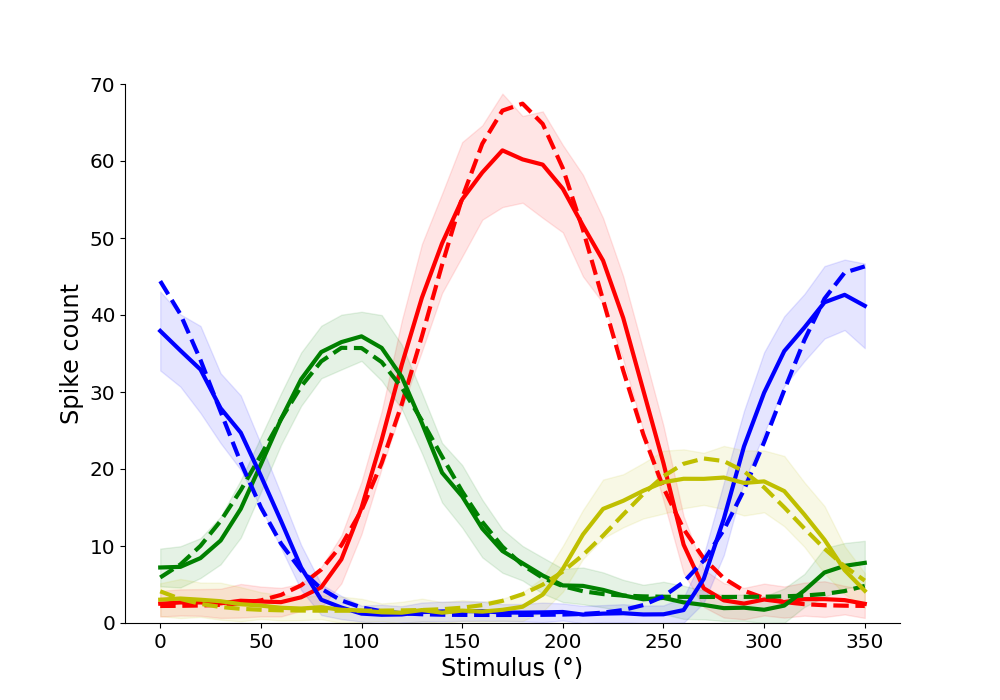

Cells  1 : [0.0325833 42.5696 67.5599]
Cells  5 : [0.0939476 41.951 35.9524]
Cells  8 : [0.0224208 40.4585 46.3702]
Cells  15 : [0.074343 43.4985 21.3817]


In [43]:
%matplotlib notebook
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'medium',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_ylim(top=70)
ax.set_ylabel("Spike count")
ax.set_xlabel("Stimulus (°)")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

colors = ['r','g','b','y']
i = 0
for c in [1,5,8,15]:

    mu = np.mean(spikeCounts[:,:,c],axis=0)
    std = np.std(spikeCounts[:,:,c],axis=0)

    ax.plot(theta_range,mu,color=colors[i], linewidth=3)
    ax.fill_between(theta_range,mu+std,mu-std, alpha=0.1,color=colors[i])
    
    global d
    global b
    global sigma_f
    global f0
    d = models_params[c][0]
    b = models_params[c][1]
    sigma_f= models_params[c][2]
    f0 = models_params[c][3]/time_bin
    
    ax.plot(theta_range,[f(theta)*time_bin for theta in theta_range],'--',color=colors[i], linewidth=3)
    
    print("Cells ",c,":",np.array([b,sigma_f,f0*time_bin]))
    i+=1


<IPython.core.display.Javascript object>


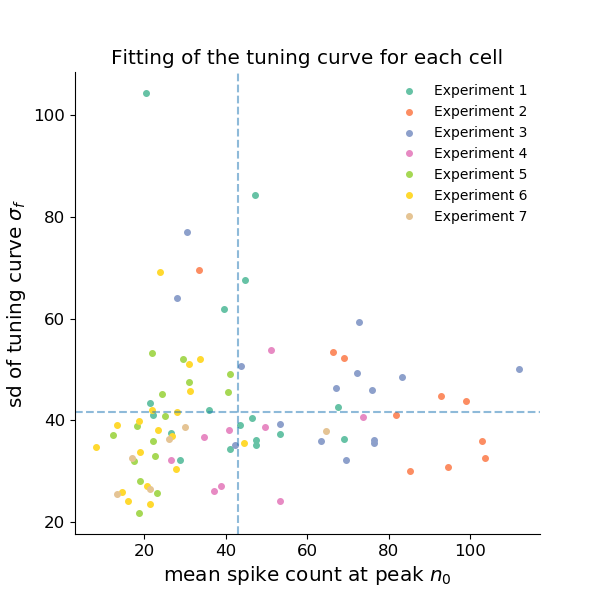

In [44]:
### Visualizing the fitting result for all cells ###

%matplotlib notebook
import brewer2mpl

colors_exp = plt.cm.Set2(np.linspace(0,1,9))

params = {'legend.fontsize': 'medium',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)

fig, axs = plt.subplots(1,1,figsize=(6,6))
colors = plt.cm.viridis(np.linspace(0,1,90))

i_exp = 0

widths = []
peaks = []

for exp in expIndexs :
    j = 0
    for c in exp:
        d = models_params[c][0]
        b = models_params[c][1]
        sigma_f= models_params[c][2]
        f0 = models_params[c][3]/time_bin

        mu = np.mean(spikeCounts[:,:,Cs[c]],axis=0)
        if j == 0:
            axs.plot(f0*time_bin, sigma_f, marker='o', markersize=4,linestyle="None",
                        color=colors_exp[i_exp], label="Experiment "+str(i_exp+1))
        else :
             axs.plot(f0*time_bin, sigma_f, marker='o', markersize=4,linestyle="None",
                    color=colors_exp[i_exp])
                
        widths.append(sigma_f)
        peaks.append(f0*time_bin)
        
        j+=1
    i_exp += 1

mean_w = np.mean(widths)
mean_p = (np.mean(peaks))

axs.axhline(mean_w,linestyle='--',alpha=0.5)
axs.axvline(mean_p,linestyle='--',alpha=0.5)

axs.legend(frameon=False)
axs.set_title('Fitting of the tuning curve for each cell')
axs.set_ylabel(r'sd of tuning curve $\sigma_f$')
axs.set_xlabel(r'mean spike count at peak $n_0$')

axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)

plt.show()

In [45]:
### compute mean parameters ###

mean_b = 0
mean_sigma_f = 0
mean_n0 = 0

for exp in expIndexs :
    for c in exp:
        mean_b+=(models_params[c][1])
        mean_sigma_f+=(models_params[c][2])
        mean_n0+=(models_params[c][3])
        
        
print("mean_b",mean_b/90)
print("mean_sigma_f",mean_sigma_f/90)
print("mean_n0",mean_n0/90)

mean_b 0.04484253005229528
mean_sigma_f 41.62833890402981
mean_n0 43.0083234373095


## Compute the empirical correlation of the data

We compute the mean correlation value for 90° and 180° preference differences.

In [50]:
import itertools  
import numpy as np
pair_0_0 = []
pair_90_90 = []
pair_180_180 = []
pair_270_270 = []

pair_0_90 = []
pair_90_180 = []
pair_180_270 = []
pair_270_0 = []

pair_0_180 = []
pair_90_270 = []

start_ind = [0,17,27,42,51,66,84]
for i in range(7):
    # we only use neurons from the same experiment to compute the correlation between themselves
    
    dir_assigned_manually_1 = np.concatenate(dir_assigned_manually[expIndexs[i]])

    index_0 = [index+start_ind[i] for index, value in enumerate(dir_assigned_manually_1) if value == 0]
    index_90 = [index+start_ind[i] for index, value in enumerate(dir_assigned_manually_1) if value == 90]
    index_180 = [index+start_ind[i] for index, value in enumerate(dir_assigned_manually_1) if value == 180]
    index_270 = [index+start_ind[i] for index, value in enumerate(dir_assigned_manually_1) if value == 270]

        
    pair_0_0 = pair_0_0 + list(itertools.combinations(index_0,2))
    pair_90_90 = pair_90_90 + list(itertools.combinations(index_90,2))
    pair_180_180 = pair_180_180 + list(itertools.combinations(index_180,2))
    pair_270_270 = pair_270_270 + list(itertools.combinations(index_270,2))
    
    pair_0_90 = pair_0_90 + list(itertools.product(index_0, index_90))
    pair_90_180 = pair_90_180 + list(itertools.product(index_90,index_180 ))
    pair_180_270 = pair_180_270 + list(itertools.product(index_180, index_270))
    pair_270_0 = pair_270_0 + list(itertools.product(index_270, index_0))
    
    pair_0_180 = pair_0_180 + list(itertools.product(index_0, index_180))
    pair_90_270 = pair_90_270 + list(itertools.product(index_90, index_270))
    

pairs_sets_0 = [[pair_0_0,0],[pair_90_90,9],[pair_180_180,18],[pair_270_270,-9]]

pairs_sets_90 = [[pair_0_90,9-4],[pair_90_180,18-4],[pair_180_270,-9-4],[pair_270_0,0-4]]

pairs_sets_180 = [[pair_0_180,-9],[pair_90_270,18]]

tot_cor_0 = []
tot_cor_90 = []
tot_cor_180 = []
s = 1
for pairs_set in pairs_sets_0 :
    for pair in pairs_set[0] : 
        cor = []
        for dir in range(36):
            cor.append(np.corrcoef(spikeCounts[:,(dir+pairs_set[1]) % 36,pair[0]],spikeCounts[:,(dir+pairs_set[1]) % 36,pair[1]])[0,1])
        tot_cor_0.append(ndimage.gaussian_filter1d(cor, sigma=s))

for pairs_set in pairs_sets_90 :
    for pair in pairs_set[0] : 
        cor = []
        for dir in range(36):
            cor.append(np.corrcoef(spikeCounts[:,(dir+pairs_set[1]) % 36,pair[0]],spikeCounts[:,(dir+pairs_set[1]) % 36,pair[1]])[0,1])
        tot_cor_90.append(ndimage.gaussian_filter1d(cor, sigma=s))
        
for pairs_set in pairs_sets_180 :
    for pair in pairs_set[0] : 
        cor = []
        for dir in range(36):
            cor.append(np.corrcoef(spikeCounts[:,(dir+pairs_set[1]) % 36,pair[0]],spikeCounts[:,(dir+pairs_set[1]) % 36,pair[1]])[0,1])
        tot_cor_180.append(ndimage.gaussian_filter1d(cor, sigma=s))

std_0 = np.nanstd(tot_cor_0,axis=0)
std_90 = np.nanstd(tot_cor_90,axis=0)
std_180 = np.nanstd(tot_cor_180,axis=0)

<IPython.core.display.Javascript object>


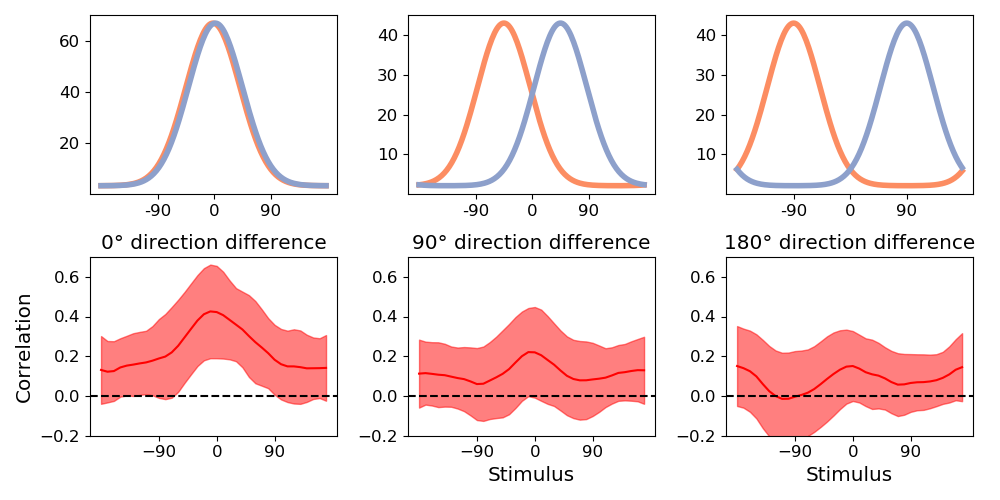

In [51]:
%matplotlib notebook
bmap = brewer2mpl.get_map('Set2', 'qualitative', 3)
colors = bmap.mpl_colors
# no we compute empirical correlation between the neuron response

fig, axs = plt.subplots(2,3,figsize=(10,5))

axs[0,0].plot(theta_range,[TC(theta,178,0.05,43,67) for theta in theta_range],color=colors[1],linewidth=4)
axs[0,0].plot(theta_range,[TC(theta,182,0.05,43,67) for theta in theta_range],color=colors[2],linewidth=4)

axs[0,1].plot(theta_range,[TC(theta,135,0.05,42,43) for theta in theta_range],color=colors[1],linewidth=4)
axs[0,1].plot(theta_range,[TC(theta,225,0.05,42,43) for theta in theta_range],color=colors[2],linewidth=4)

axs[0,2].plot(theta_range,[TC(theta,90,0.05,42,43) for theta in theta_range],color=colors[1],linewidth=4)
axs[0,2].plot(theta_range,[TC(theta,270,0.05,42,43) for theta in theta_range],color=colors[2],linewidth=4)

axs[1,0].plot(range(-180,180,10),np.nanmean(tot_cor_0,axis=0),color='r')
axs[1,1].plot(range(-180,180,10),np.nanmean(tot_cor_90,axis=0),color='r')
axs[1,2].plot(range(-180,180,10),np.nanmean(tot_cor_180,axis=0),color='r')



cor_90 = np.nanmean(tot_cor_90,axis=0)
cor_180 = np.nanmean(tot_cor_180,axis=0)

axs[1,0].fill_between(range(-180,180,10),np.nanmean(tot_cor_0,axis=0)+std_0,np.nanmean(tot_cor_0,axis=0)-std_0, alpha=0.5,color='r')
axs[1,1].fill_between(range(-180,180,10),np.nanmean(tot_cor_90,axis=0)+std_90,np.nanmean(tot_cor_90,axis=0)-std_90, alpha=0.5,color='r')
axs[1,2].fill_between(range(-180,180,10),np.nanmean(tot_cor_180,axis=0)+std_180,np.nanmean(tot_cor_180,axis=0)-std_180, alpha=0.5,color='r')


axs[1,0].axhline(y=0, color='black', linestyle='--')
axs[1,1].axhline(y=0, color='black', linestyle='--')
axs[1,2].axhline(y=0, color='black', linestyle='--')

axs[1,0].set_ylim(-0.2,0.7)
axs[1,1].set_ylim(-0.2,0.7)
axs[1,2].set_ylim(-0.2,0.7)


axs[0,0].set_xticks([90,180,270])
axs[0,1].set_xticks([90,180,270])
axs[0,2].set_xticks([90,180,270])
axs[0,0].set_xticklabels([-90,0,90])
axs[0,1].set_xticklabels([-90,0,90])
axs[0,2].set_xticklabels([-90,0,90])

axs[1,0].set_xticks([-90,0,90])
axs[1,1].set_xticks([-90,0,90])
axs[1,2].set_xticks([-90,0,90])

axs[1,0].set_title("0° direction difference")
axs[1,1].set_title("90° direction difference")
axs[1,2].set_title("180° direction difference")

axs[1,0].set_yticks([-0.2,0,0.2,0.4,0.6])
axs[1,1].set_yticks([-0.2,0,0.2,0.4,0.6])
axs[1,2].set_yticks([-0.2,0,0.2,0.4,0.6])

axs[1,0].set_ylabel("Correlation")
axs[1,1].set_xlabel("Stimulus")
axs[1,2].set_xlabel("Stimulus")
fig.tight_layout()
plt.show()